In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [2]:
# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

from dateutil.relativedelta import relativedelta

**Import claims_data.csv and cust_data.csv which is provided to you and 
combine the two datasets appropriately to create a 360-degree view of 
the data. Use the same for the subsequent questions.**

In [3]:
claims = pd.read_csv('claims.csv')
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
cust_info = pd.read_csv('cust_demographics.csv')
cust_info

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [5]:
Cust_data = pd.merge(cust_info,claims, how = 'inner',left_on = 'CUST_ID',right_on = 'customer_id')
Cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


**Perform a data audit for the datatypes and find out if there are any 
mismatch within the current datatypes of the columns and their 
business significance.**

In [6]:
Cust_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   customer_id          1085 non-null   int64  
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

In [7]:
Cust_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

**Convert the column claim_amount to numeric. Use the appropriate 
modules/attributes to remove the $ sign.**

In [8]:
Cust_data['claim_amount']= Cust_data['claim_amount'].str.replace('$',' ')
Cust_data

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_11244/114373597.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Cust_data['claim_amount']= Cust_data['claim_amount'].str.replace('$',' ')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840,4.0,No


In [9]:
Cust_data['claim_amount'] = pd.to_numeric(Cust_data['claim_amount'])
Cust_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
dtype: object

In [10]:
Cust_data['total_policy_claims'].isna().sum()

10

In [11]:
Cust_data['total_policy_claims']

0       1.0
1       3.0
2       1.0
3       6.0
4       1.0
       ... 
1080    1.0
1081    1.0
1082    2.0
1083    4.0
1084    1.0
Name: total_policy_claims, Length: 1085, dtype: float64

In [12]:
Cust_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
dtype: object

**Of all the injury claims, some of them have gone unreported with the 
police. Create an alert flag (1,0) for all such claims.**

In [13]:
police_report_flag = pd.Series(np.where(Cust_data.police_report == 'Yes', 1, 0))
Cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No


**One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID 
should remain unique. 
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.**

In [14]:
Cust_data['years'] = pd.DatetimeIndex(Cust_data['claim_date']).year
Cust_data.sort_values(by = 'years',ascending = False)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,years
542,9600820,Female,19-Feb-62,MN,356-384-4378,Gold,41574198,9600820,Other causes,09/06/2018,Auto,Unknown,Injury only,29830.0,1.0,No,2018
426,62934102,Female,25-Jul-97,OR,518-352-6498,Silver,1756485,62934102,Other driver error,05/21/2018,Auto,Yes,Material and injury,39280.0,3.0,No,2018
414,7612094,Male,26-Aug-83,UT,145-734-4176,Gold,75623323,7612094,Natural causes,09/06/2018,Auto,No,Material only,2771.5,1.0,Yes,2018
416,92072156,Female,28-Jul-71,DE,186-419-2974,Silver,87476916,92072156,Natural causes,09/12/2018,Auto,Yes,Material only,2970.0,1.0,No,2018
846,56075921,Female,05-Jul-69,FL,148-396-5961,Platinum,27638017,56075921,Other driver error,02/22/2018,Auto,No,Material only,1587.0,4.0,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,20028241,Male,19-Sep-90,MA,762-628-3261,Platinum,88210615,20028241,Driver error,05/29/2017,Auto,No,Material only,2940.0,1.0,No,2017
461,98341654,Male,16-Dec-97,NH,375-624-6749,Platinum,84019240,98341654,Crime,12/03/2017,Auto,Unknown,Material only,2370.0,1.0,No,2017
463,76185878,Male,27-Jan-94,NC,463-812-2598,Gold,45568058,76185878,Driver error,11/27/2017,Auto,No,Material only,3231.5,1.0,Yes,2017
464,18665169,Female,24-Feb-72,MD,429-825-9486,Gold,63762170,18665169,Other causes,07/22/2017,Auto,No,Injury only,37500.0,2.0,No,2017


In [15]:
Cust_recent_data = Cust_data.loc[ : ,['CUST_ID','DateOfBirth','claim_date','claim_type','claim_amount']]
Cust_recent_data

,CUST_ID,DateOfBirth,claim_date,claim_type,claim_amount
0,21868593,12-Jan-79,11/27/2017,Material only,2980.0
1,75740424,13-Jan-70,10/03/2018,Material only,2980.0
2,30308357,11-Mar-84,02/02/2018,Material only,3369.5
3,30308357,11-Mar-84,04/04/2018,Material only,1950.0
4,47830476,01-May-86,06/17/2018,Material only,1680.0
...,...,...,...,...,...
1080,79539873,15-Mar-81,09/06/2018,Material only,1770.0
1081,42364152,07-Jul-96,05/09/2017,Material only,2800.0
1082,19888166,11-Apr-90,05/15/2017,Injury only,33080.0
1083,11256802,22-Oct-64,04/18/2017,Material only,2840.0


In [16]:
Cust_recent_data.nunique()

CUST_ID         1078
DateOfBirth     1078
claim_date       100
claim_type         3
claim_amount     676
dtype: int64

In [17]:
trial_data = Cust_recent_data.groupby(['CUST_ID','claim_type'])['claim_type'].count()

In [18]:
trial_data = pd.DataFrame(trial_data)
trial_data

,,claim_type
CUST_ID,claim_type,
154557,Injury only,1
263204,Material and injury,1
287476,Material only,1
441097,Material and injury,1
524545,Injury only,1
...,...,...
99674324,Injury only,1
99723844,Material and injury,1
99761663,Material only,1


In [19]:
Cust_data = Cust_data.drop_duplicates(subset = 'CUST_ID')
Cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,years
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2018
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2018
6,19269962,Male,13-May-77,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2018
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,2017
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2017
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,2017


In [20]:
Cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,years
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2018
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2018
6,19269962,Male,13-May-77,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2018
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,2017
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2017
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,2017


In [21]:
Cust_data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
years                   0
dtype: int64

**Check for missing values and impute the missing values with an 
appropriate value. (mean for continuous and mode for categorical)**

In [22]:
Cust_data['claim_amount'] = Cust_data.claim_amount.fillna(Cust_data.claim_amount.mean())

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_11244/2658036209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_data['claim_amount'] = Cust_data.claim_amount.fillna(Cust_data.claim_amount.mean())


In [23]:
Cust_data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
years                   0
dtype: int64

In [24]:
mode = Cust_data.total_policy_claims.mode()
mode

0    1.0
dtype: float64

In [25]:
Cust_data['total_policy_claims'] = Cust_data['total_policy_claims'].fillna(1.0)
Cust_data

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_11244/1356634811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_data['total_policy_claims'] = Cust_data['total_policy_claims'].fillna(1.0)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,years
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2018
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2018
6,19269962,Male,13-May-77,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2018
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,2017
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2017
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,2017


In [26]:
Cust_data.isna().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
years                  0
dtype: int64

In [27]:
Cust_data.groupby('total_policy_claims')['total_policy_claims'].count().sum(axis=0)

1078

In [28]:
Cust_data.groupby('total_policy_claims')['total_policy_claims'].count()

total_policy_claims
1.0    791
2.0    104
3.0     86
4.0     58
5.0     27
6.0      9
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [29]:
Cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,years
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2018
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2018
6,19269962,Male,13-May-77,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2018
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,2017
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2017
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,2017


**Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria:**
    
**Children < 18**

**Youth 18-30**

**Adult 30-60**

**Senior > 60**

In [30]:
Cust_data['birth_year']= pd.DatetimeIndex(Cust_data['DateOfBirth']).year

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_11244/1169286502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_data['birth_year']= pd.DatetimeIndex(Cust_data['DateOfBirth']).year


In [31]:
Cust_data['birth_year']= pd.DatetimeIndex(Cust_data['DateOfBirth']).year
Cust_data

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_11244/1570958116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_data['birth_year']= pd.DatetimeIndex(Cust_data['DateOfBirth']).year


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,years,birth_year
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017,1979
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018,2070
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2018,1984
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2018,1986
6,19269962,Male,13-May-77,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,2018,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2018,1981
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,2017,1996
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2017,1990
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,2017,2064


In [32]:
Cust_data['DateOfBirth']= pd.to_datetime(Cust_data.DateOfBirth)

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_11244/3687038455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_data['DateOfBirth']= pd.to_datetime(Cust_data.DateOfBirth)


In [33]:
from datetime import datetime, date
Present = pd.Timestamp.now()
Present = pd.to_datetime(Present)
Present.year

2022

In [34]:
Birth_year_updated = pd.Series(np.where(Cust_data['DateOfBirth'].dt.year>=Present.year,Cust_data['DateOfBirth'].dt.year - 100,Cust_data['DateOfBirth'].dt.year))
Birth = pd.DataFrame(Birth_year_updated)
Birth = Birth.rename(columns={0:'Birth_year'})
Birth['Present_year']= Present.year
Birth['Age'] = Birth['Present_year']-Birth['Birth_year']
Birth

,Birth_year,Present_year,Age
0,1979,2022,43
1,1970,2022,52
2,1984,2022,38
3,1986,2022,36
4,1977,2022,45
...,...,...,...
1073,1981,2022,41
1074,1996,2022,26
1075,1990,2022,32
1076,1964,2022,58


In [35]:
Cust_data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
years                           int64
birth_year                      int64
dtype: object

In [36]:
s_list = Birth['Age'].tolist()
s_list

[43,
 52,
 38,
 36,
 45,
 45,
 23,
 23,
 29,
 56,
 37,
 23,
 32,
 59,
 53,
 45,
 35,
 56,
 57,
 43,
 55,
 48,
 23,
 42,
 41,
 27,
 37,
 26,
 60,
 53,
 28,
 54,
 51,
 34,
 48,
 28,
 33,
 46,
 45,
 43,
 32,
 41,
 47,
 27,
 36,
 26,
 27,
 29,
 27,
 28,
 27,
 28,
 45,
 52,
 59,
 54,
 47,
 45,
 58,
 54,
 38,
 33,
 51,
 24,
 32,
 62,
 56,
 61,
 59,
 53,
 34,
 50,
 35,
 58,
 48,
 57,
 34,
 28,
 32,
 55,
 29,
 36,
 46,
 30,
 35,
 36,
 51,
 52,
 55,
 25,
 33,
 60,
 51,
 55,
 37,
 62,
 38,
 37,
 61,
 36,
 25,
 49,
 59,
 60,
 40,
 44,
 26,
 59,
 56,
 38,
 32,
 52,
 42,
 53,
 53,
 24,
 57,
 27,
 31,
 42,
 26,
 27,
 59,
 43,
 52,
 42,
 52,
 40,
 49,
 29,
 43,
 40,
 37,
 34,
 33,
 36,
 25,
 43,
 34,
 41,
 40,
 38,
 24,
 35,
 43,
 44,
 48,
 31,
 53,
 23,
 23,
 24,
 35,
 28,
 37,
 23,
 62,
 62,
 46,
 46,
 40,
 55,
 57,
 24,
 59,
 55,
 61,
 59,
 52,
 28,
 29,
 61,
 37,
 37,
 27,
 25,
 51,
 28,
 48,
 53,
 51,
 59,
 57,
 33,
 44,
 47,
 62,
 50,
 31,
 29,
 54,
 48,
 34,
 62,
 55,
 42,
 30,
 46,
 56,
 33,


In [241]:
Birth.loc[(Birth.Age < 18),  'AgeGroup'] = 'Children'
Birth.loc[(Birth.Age >= 18) & (Birth.Age < 30),  'AgeGroup'] = 'Youth'
Birth.loc[(Birth.Age >= 30) & (Birth.Age < 60),  'AgeGroup'] = 'Adult'
Birth.loc[(Birth.Age > 60),  'AgeGroup'] = 'Senior'

In [249]:
Birth

,Birth_year,Present_year,Age,AgeGroup,cause,State
0,1979,2022,43,Adult,Driver error,VT
1,1970,2022,52,Adult,Crime,ME
2,1984,2022,38,Adult,Other driver error,TN
3,1986,2022,36,Adult,NaN,NaN
4,1977,2022,45,Adult,Natural causes,MA
...,...,...,...,...,...,...
1073,1981,2022,41,Adult,Driver error,NC
1074,1996,2022,26,Youth,Driver error,AZ
1075,1990,2022,32,Adult,Driver error,FL
1076,1964,2022,58,Adult,Crime,HI


**What is the average amount claimed by the customers from various 
segments?**

In [39]:
Cust_data.groupby('Segment')['claim_amount'].mean().round(2)

Segment
Gold        12756.48
Platinum    12369.30
Silver      12269.43
Name: claim_amount, dtype: float64

**What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.**

In [57]:
Trial_data = Cust_data.loc[ : ,['incident_cause','claim_date','claim_amount']].sort_values(by = 'claim_date',ascending = True)

In [73]:
Trial_data['Year_of_claim']= pd.DatetimeIndex(Trial_data['claim_date']).year
Trial_data['Month_of_claim']= pd.DatetimeIndex(Trial_data['claim_date']).month
Trial_data['Date_of_claim']= pd.DatetimeIndex(Trial_data['claim_date']).day

In [77]:
Trial_data = Trial_data.sort_values(by= ['Year_of_claim','Month_of_claim','Date_of_claim'],ascending = False)

In [93]:
Trial_data.reset_index(inplace = True)

In [169]:
Trial_data

,index,incident_cause,claim_date,claim_amount,Year_of_claim,Month_of_claim,Date_of_claim
0,322,Other driver error,10/30/2018,12470.498519,2018,10,30
1,226,Crime,10/30/2018,17020.000000,2018,10,30
2,238,Driver error,10/30/2018,26310.000000,2018,10,30
3,354,Crime,10/30/2018,1940.000000,2018,10,30
4,697,Driver error,10/30/2018,1860.000000,2018,10,30
...,...,...,...,...,...,...,...
1073,739,Driver error,01/01/2017,1840.000000,2017,1,1
1074,1064,Natural causes,01/01/2017,20630.000000,2017,1,1
1075,231,Other causes,01/01/2017,20200.000000,2017,1,1
1076,905,Other causes,01/01/2017,27670.000000,2017,1,1


In [197]:
from datetime import date,timedelta
date = date(2018,10,1)
date_diff = date - timedelta(days =20)
date_diff = date_diff.strftime(format = '%Y-%m-%d')

In [188]:
Trial_data['claim_date'] = pd.to_datetime(Trial_data.claim_date)
Trial_data.dtypes

index                      int64
incident_cause            object
claim_date        datetime64[ns]
claim_amount             float64
Year_of_claim              int64
Month_of_claim             int64
Date_of_claim              int64
dtype: object

In [190]:
Trial_data

,index,incident_cause,claim_date,claim_amount,Year_of_claim,Month_of_claim,Date_of_claim
0,322,Other driver error,2018-10-30,12470.498519,2018,10,30
1,226,Crime,2018-10-30,17020.000000,2018,10,30
2,238,Driver error,2018-10-30,26310.000000,2018,10,30
3,354,Crime,2018-10-30,1940.000000,2018,10,30
4,697,Driver error,2018-10-30,1860.000000,2018,10,30
...,...,...,...,...,...,...,...
1073,739,Driver error,2017-01-01,1840.000000,2017,1,1
1074,1064,Natural causes,2017-01-01,20630.000000,2017,1,1
1075,231,Other causes,2017-01-01,20200.000000,2017,1,1
1076,905,Other causes,2017-01-01,27670.000000,2017,1,1


In [210]:
final_Trial_data = Trial_data[Trial_data.claim_date <= date_diff]

In [212]:
final_Trial_data.groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.244625e+05
Driver error          3.264286e+06
Natural causes        1.312706e+06
Other causes          3.725038e+06
Other driver error    3.318806e+06
Name: claim_amount, dtype: float64

**How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes?** 

In [230]:
Birth['cause']= Cust_data['incident_cause']

In [254]:
Birth['State'] = Cust_data['State']

In [268]:
take = list(Cust_data.CUST_ID)
Birth['cust_id']=pd.Series(take)
Birth

,Birth_year,Present_year,Age,AgeGroup,cause,State,cust_id
0,1979,2022,43,Adult,Driver error,VT,21868593
1,1970,2022,52,Adult,Crime,ME,75740424
2,1984,2022,38,Adult,Other driver error,TN,30308357
3,1986,2022,36,Adult,NaN,NaN,47830476
4,1977,2022,45,Adult,Natural causes,MA,19269962
...,...,...,...,...,...,...,...
1073,1981,2022,41,Adult,Driver error,NC,79539873
1074,1996,2022,26,Youth,Driver error,AZ,42364152
1075,1990,2022,32,Adult,Driver error,FL,19888166
1076,1964,2022,58,Adult,Crime,HI,11256802


In [335]:
Updated_birth = Birth.loc[((Birth.cause == "Driver error")|(Birth.cause == "Other driver error"))& ((Birth.State == 'TX')|(Birth.State == 'DE')|(Birth.State == 'AK')) ,['AgeGroup','cause','State','cust_id']]
Updated_birth2 = Updated_birth[Updated_birth.AgeGroup == "Adult"]
Updated_birth2.groupby(['State'])['cust_id'].count()

State
AK     8
DE    12
TX     8
Name: cust_id, dtype: int64

**Draw a pie chart between the aggregated value of claim amount based 
on gender and segment. Represent the claim amount as a percentage on
the pie chart.**


In [347]:
%matplotlib notebook

<IPython.core.display.Javascript object>


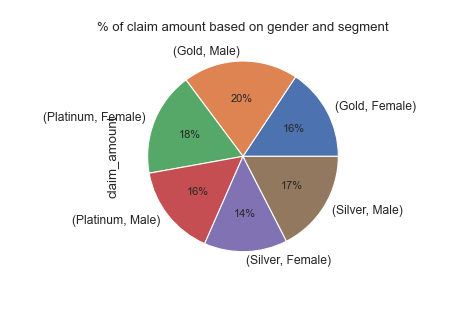

<function matplotlib.pyplot.show(block=None)>

In [388]:
Cust_data.groupby(['Segment','gender']).claim_amount.sum().plot(kind = 'pie',autopct='%.0f%%',fig=(12.5,10))
plt.title ('% of claim amount based on gender and segment')
plt.show

**Among males and females, which gender had claimed the most for any 
type of driver related issues? E.g. This metric can be compared using a 
bar chart.**

In [368]:
gender_list = list(Cust_data.gender)
Birth['gender'] = pd.Series(gender_list)
Birth

,Birth_year,Present_year,Age,AgeGroup,cause,State,cust_id,gender
0,1979,2022,43,Adult,Driver error,VT,21868593,Female
1,1970,2022,52,Adult,Crime,ME,75740424,Female
2,1984,2022,38,Adult,Other driver error,TN,30308357,Female
3,1986,2022,36,Adult,NaN,NaN,47830476,Female
4,1977,2022,45,Adult,Natural causes,MA,19269962,Male
...,...,...,...,...,...,...,...,...
1073,1981,2022,41,Adult,Driver error,NC,79539873,Female
1074,1996,2022,26,Youth,Driver error,AZ,42364152,Female
1075,1990,2022,32,Adult,Driver error,FL,19888166,Male
1076,1964,2022,58,Adult,Crime,HI,11256802,Female


In [376]:
Gender_cause_data = Cust_data.loc[(Cust_data.incident_cause == 'Driver error')| (Cust_data.incident_cause == 'Other driver error')]
Gender_cause_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,years,birth_year
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017,1979
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2018,1984
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,2017,1977
10,18401412,Male,1999-03-02,AR,752-398-2914,Gold,12878692,18401412,Driver error,01/13/2018,Auto,No,Material only,1730.0,4.0,No,2018,1999
14,99103685,Female,1985-12-30,KY,764-439-9856,Gold,74165873,99103685,Other driver error,01/13/2018,Home,No,Material only,1495.0,1.0,Yes,2018,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,82089910,Male,1973-10-09,FL,257-248-4825,Silver,28084004,82089910,Driver error,06/03/2018,Auto,No,Material only,2780.0,1.0,No,2018,1973
1078,6756905,Male,1997-10-21,NE,924-427-8125,Silver,47457836,6756905,Driver error,01/21/2017,Auto,No,Material only,2320.0,3.0,No,2017,1997
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2018,1981
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2017,1990


incident_cause  Driver error  Other driver error
gender                                          
Female            1037743.49          2099987.99
Male              2479464.48          1459442.99


<IPython.core.display.Javascript object>


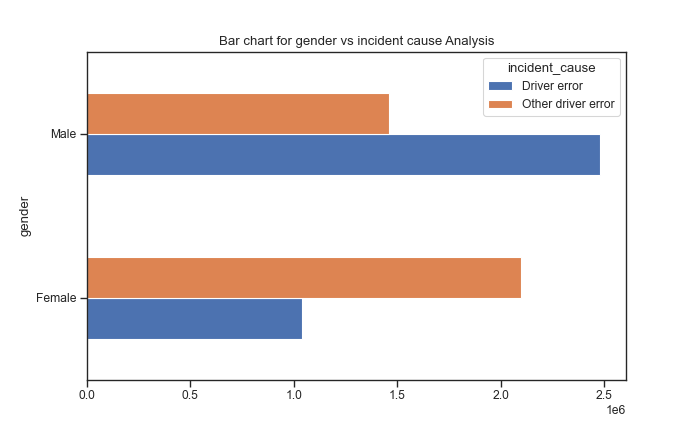

In [478]:
Gender_cause = Gender_cause_data.pivot_table(index = 'gender', columns = 'incident_cause',values = 'claim_amount',aggfunc = 'sum').round(2)
print(Gender_cause)
Gender_cause.plot(kind = 'barh',figsize = (8,5))
plt.title('Bar chart for gender vs incident cause Analysis')
plt.show()

**Which age group had the maximum fraudulent policy claims? Visualize 
it on a bar chart.**

In [405]:
Cust_data.loc[Cust_data.fraudulent == 'Yes']

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,years,birth_year
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017,1979
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018,2070
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2018,1984
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2018,1986
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,2018,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2018,1981
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,2017,1996
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2017,1990
1083,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,2017,2064


In [473]:
fraud_list = list(Cust_data.fraudulent)
Birth['fraudulent']= pd.Series(fraud_list)

In [421]:
b = Birth.loc[Birth.fraudulent == 'Yes']

In [424]:
v_data = b.groupby('AgeGroup')['fraudulent'].count().sort_values(ascending = False)

AgeGroup
Adult     187
Youth      39
Senior     12
Name: fraudulent, dtype: int64


<IPython.core.display.Javascript object>


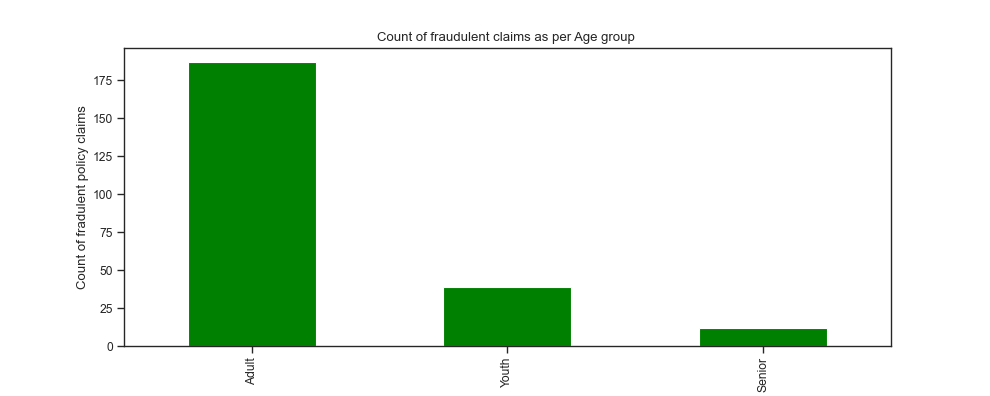

Text(0, 0.5, 'Count of fradulent policy claims')

In [476]:
print(v_data)
v_data.plot(kind = 'bar', color = 'green', figsize = (12.5,5))
plt.title('Count of fraudulent claims as per Age group ')
plt.xlabel('Age Group')
plt.ylabel('Count of fradulent policy claims')

**Visualize the monthly trend of the total amount that has been claimed 
by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order.** 

<IPython.core.display.Javascript object>


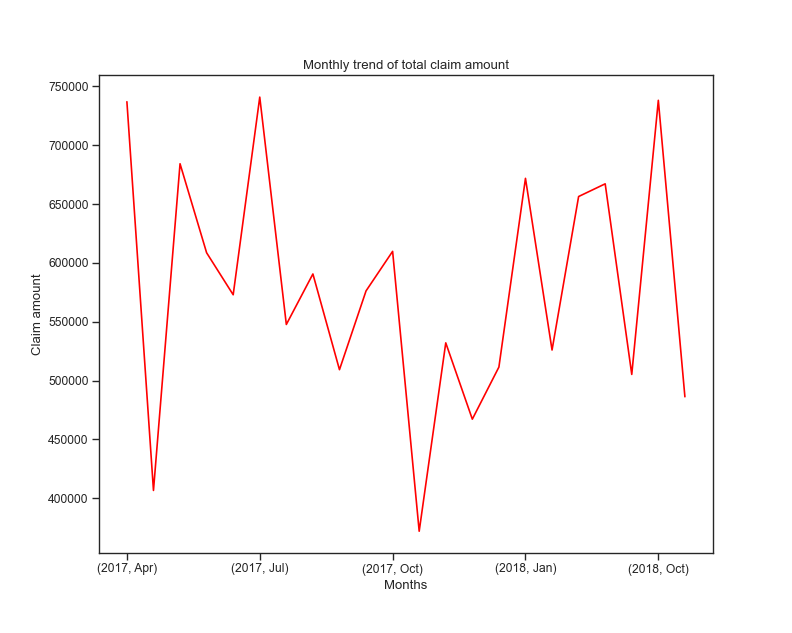

Text(0.5, 1.0, 'Monthly trend of total claim amount')

In [479]:
Cust_recent_data['month']= pd.DatetimeIndex(Cust_recent_data['claim_date']).month
Cust_recent_data['year']= pd.DatetimeIndex(Cust_recent_data['claim_date']).year
Cust_recent_data['claim_date'] = pd.to_datetime(Cust_recent_data.claim_date)
Cust_recent_data['month_name'] = Cust_recent_data['claim_date'].dt.strftime('%b')
Cust_recent_data.groupby(['year','month_name']).claim_amount.sum().plot(kind = 'line',color = 'red',figsize = (10,8))
plt.xlabel('Months')
plt.ylabel('Claim amount')
plt.title('Monthly trend of total claim amount')

**What is the average claim amount for gender and age categories and 
suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims.**

In [531]:
amount = list(Cust_data.claim_amount)
Birth['Claim_amount'] = pd.Series(amount)
Birth

,Birth_year,Present_year,Age,AgeGroup,cause,State,cust_id,gender,fraudulent,Claim_amount
0,1979,2022,43,Adult,Driver error,VT,21868593,Female,No,2980.0
1,1970,2022,52,Adult,Crime,ME,75740424,Female,No,2980.0
2,1984,2022,38,Adult,Other driver error,TN,30308357,Female,Yes,3369.5
3,1986,2022,36,Adult,NaN,NaN,47830476,Female,No,1680.0
4,1977,2022,45,Adult,Natural causes,MA,19269962,Male,No,2680.0
...,...,...,...,...,...,...,...,...,...,...
1073,1981,2022,41,Adult,Driver error,NC,79539873,Female,No,1770.0
1074,1996,2022,26,Youth,Driver error,AZ,42364152,Female,No,2800.0
1075,1990,2022,32,Adult,Driver error,FL,19888166,Male,No,33080.0
1076,1964,2022,58,Adult,Crime,HI,11256802,Female,No,2840.0


In [555]:
Birth_grouped_fdata = pd.DataFrame(Birth.loc[(Birth.fraudulent=="Yes")].groupby(['AgeGroup','gender'])[['Claim_amount']].mean().add_prefix("Fraud_").round(2))
Birth_grouped_fdata

Fraud_Claim_amount
AgeGroup gender                    
Adult    Female            12527.42
         Male              16281.50
Senior   Female             4387.89
         Male              28232.50
Youth    Female             9214.55
         Male               7797.89

In [586]:
Birth_grouped_nfdata = pd.DataFrame(Birth.loc[(Birth.fraudulent=="No")].groupby(['AgeGroup','gender'])[['Claim_amount']].mean().add_prefix("Not_Fraud_").round(2))
Birth_grouped_nfdata

Not_Fraud_Claim_amount
AgeGroup gender                        
Adult    Female                12015.89
         Male                  12183.88
Senior   Female                13773.28
         Male                  13766.19
Youth    Female                13172.62
         Male                  12087.42

In [587]:
Birth_grouped_final=round(pd.merge(Birth_grouped_fdata,Birth_grouped_nfdata, on=["gender","AgeGroup"]),2)
Birth_grouped_final = Birth_grouped_final.rename_axis(['index1','index2']).reset_index()
Birth_grouped_final = Birth_grouped_final.rename(columns = {'index1':'gender','index2':'AgeGroup'})
Birth_grouped_final

,gender,AgeGroup,Fraud_Claim_amount,Not_Fraud_Claim_amount
0,Female,Adult,12527.42,12015.89
1,Male,Adult,16281.50,12183.88
2,Female,Senior,4387.89,13773.28
3,Male,Senior,28232.50,13766.19
4,Female,Youth,9214.55,13172.62
5,Male,Youth,7797.89,12087.42


<IPython.core.display.Javascript object>


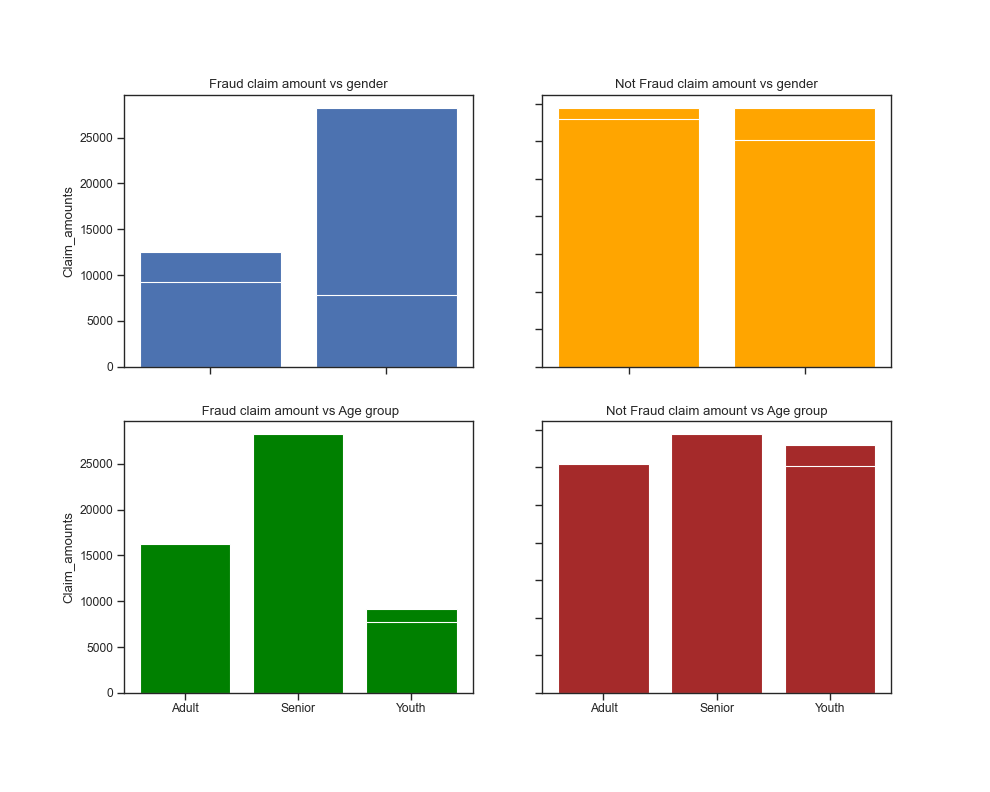

In [597]:
fig, axs = plt.subplots(2,2,figsize = (12.5,10))
axs[0,0].bar(Birth_grouped_final.gender,Birth_grouped_final.Fraud_Claim_amount)
axs[0, 0].set_title('Fraud claim amount vs gender')
axs[0,1].bar(Birth_grouped_final.gender,Birth_grouped_final.Not_Fraud_Claim_amount,color = 'orange')
axs[0, 1].set_title('Not Fraud claim amount vs gender')
axs[1,0].bar(Birth_grouped_final.AgeGroup,Birth_grouped_final.Fraud_Claim_amount,color = 'green')
axs[1, 0].set_title(' Fraud claim amount vs Age group')
axs[1,1].bar(Birth_grouped_final.AgeGroup,Birth_grouped_final.Not_Fraud_Claim_amount,color = 'brown')
axs[1, 1].set_title('Not Fraud claim amount vs Age group')

# getting the y-axis
for ax in axs.flat:
    ax.set(ylabel='Claim_amounts')
    
#hiding the axis labels for right plots
for ax in axs.flat:
    ax.label_outer()

**Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements.**

In [598]:
import scipy.stats as stats

**Is there any similarity in the amount claimed by males and females?**


In [637]:
Male_claim_amt = Cust_data.loc[Cust_data.gender == 'Male',['gender','claim_amount']]
Male_claim_amt = Male_claim_amt.rename(columns = {'claim_amount':'Male_claim_amounts'})

In [640]:
Female_claim_amt = Cust_data.loc[Cust_data.gender == 'Female',['gender','claim_amount']]
Female_claim_amt = Female_claim_amt.rename(columns = {'claim_amount':'Female_claim_amounts'})

In [641]:
m_list = list(Male_claim_amt.Male_claim_amounts)
f_list = list(Female_claim_amt.Female_claim_amounts)

In [644]:
Claim_amounts =  pd.DataFrame()

In [647]:
Claim_amounts['Male']=pd.Series(m_list)
Claim_amounts['Female']=pd.Series(f_list)
Claim_amounts

,Male,Female
0,2680.0,2980.0
1,38306.5,2980.0
2,1730.0,3369.5
3,1160.0,1680.0
4,2620.0,2748.5
...,...,...
546,2290.0,NaN
547,2320.0,NaN
548,2173.5,NaN
549,33080.0,NaN


In [653]:
Claim_amounts.Female.isna().sum()

24

In [661]:
pf0 = Claim_amounts.Female.min()
pf100 = Claim_amounts.Female.max()
print(pf0)
print(pf100)

1000.0
48150.5


In [662]:
f_median = Claim_amounts.Female.quantile(0.5)
print(f_median)

2886.5


In [664]:
pf25 = Claim_amounts.Female.quantile(0.25)
pf75 = Claim_amounts.Female.quantile(0.75)
print(pf25)
print(pf75)

1909.5
22050.0


In [667]:
iqr = pf75 - pf25
iqr

20140.5

In [673]:
lower_out = pf25 - (1.5*iqr)
print('Lower outliers of female claim amounts:',lower_out)
upper_out = pf75 + (1.5*iqr)
print('Upper outliers of female claim amounts:',upper_out)
print('There are no outliers in the data points of female claim amounts so we can just replace the NaN values with the median values')

Lower outliers of female claim amounts: -28301.25
Upper outliers of female claim amounts: 52260.75
There are no outliers in the data points of female claim amounts.


In [676]:
Claim_amounts['Female'] = Claim_amounts.Female.fillna(f_median)
Claim_amounts

,Male,Female
0,2680.0,2980.0
1,38306.5,2980.0
2,1730.0,3369.5
3,1160.0,1680.0
4,2620.0,2748.5
...,...,...
546,2290.0,2886.5
547,2320.0,2886.5
548,2173.5,2886.5
549,33080.0,2886.5


***Null hypothesis (H0): There is no similarity in the amount claimed by males and females.***

***Alternate hypothesis (Ha): There is a similarity in the amount claimed by males and females.***

***Rejection Rules:
Confidence Intervals: 95%,
p-value             : 0.05***

In [677]:
stats.ttest_ind(Claim_amounts.Male,Claim_amounts.Female)

Ttest_indResult(statistic=1.4016900365249458, pvalue=0.16128992101124856)

***pvalue is greater than 0.05, therefore we cannot reject the null hypothesis.And hence we can say there is no similarity in the amount claimed by males and females.***

 **Is there any relationship between age category and segment?**

In [694]:
r_list = list(Cust_data.Segment)
Birth['Segment']=pd.Series(r_list)
Birth

,Birth_year,Present_year,Age,AgeGroup,cause,State,cust_id,gender,fraudulent,Claim_amount,Segment
0,1979,2022,43,Adult,Driver error,VT,21868593,Female,No,2980.0,Platinum
1,1970,2022,52,Adult,Crime,ME,75740424,Female,No,2980.0,Silver
2,1984,2022,38,Adult,Other driver error,TN,30308357,Female,Yes,3369.5,Silver
3,1986,2022,36,Adult,NaN,NaN,47830476,Female,No,1680.0,Silver
4,1977,2022,45,Adult,Natural causes,MA,19269962,Male,No,2680.0,Gold
...,...,...,...,...,...,...,...,...,...,...,...
1073,1981,2022,41,Adult,Driver error,NC,79539873,Female,No,1770.0,Platinum
1074,1996,2022,26,Youth,Driver error,AZ,42364152,Female,No,2800.0,Silver
1075,1990,2022,32,Adult,Driver error,FL,19888166,Male,No,33080.0,Gold
1076,1964,2022,58,Adult,Crime,HI,11256802,Female,No,2840.0,Silver


In [699]:
observed_data = pd.crosstab(index = Birth.Segment, columns = Birth.AgeGroup)
observed_data

AgeGroup,Adult,Senior,Youth
Segment,,,
Gold,272,15,71
Platinum,266,17,69
Silver,257,17,68


***Null hypothesis (Ho)= There is no relationship between Age category and Segment.***

***Alternate hypothesis (Ha)= There is a relationship between Age category and Segment.***

***Confidence Interval: 95% ; p-value = 0.05***

In [700]:
stats.chi2_contingency(observed_data)

(0.2863689090540976,
 0.9906770257429756,
 4,
 array([[270.5418251 ,  16.67490494,  70.78326996],
        [266.00760456,  16.39543726,  69.59695817],
        [258.45057034,  15.92965779,  67.61977186]]))

***p_value of the data is 0.9906 > 0.05, so we cannot reject the null hypothesis.
And therefore, we can say that there is no relationship between Age category and Segment.***

**The current year has shown a significant rise in claim amounts as 
compared to 2016-17 fiscal average which was $10,000.**


***Null hypothesis (Ho) : Fiscal average 2017-18 <= Fiscal average 2016-17***

***Alternate hypothesis (Ha): Fiscal average 2017-18 > Fiscal average 2016-17***
    
***Confidence interval : 95% ; p-value = 0.05***    

In [705]:
Fiscal_amt_17_18 = Cust_data.claim_amount
Fiscal_amt_17_18.mean()

12470.498519249744

In [706]:
stats.ttest_1samp(Cust_data.claim_amount,10000)

Ttest_1sampResult(statistic=6.068796577191384, pvalue=1.7827316562159517e-09)

***p-value <0.05, hence we can reject the null hypothesis and
conclude the current year has shown a significant rise in claim amounts in 2017-18 as compared to 2017-18.***

 **Is there any difference between age groups and insurance claims?**

***Ho : There is no difference between age groups and insurance claims.***

***Ha : There is a difference between age groups and insurance claims.***
    
***Confidence intervals: 95% ; p-value : 0.05***

In [711]:
pc_list = list(Cust_data.total_policy_claims)
Birth['policy_claims']=pd.Series(pc_list)
Birth.policy_claims.unique()

array([1., 3., 4., 2., 5., 7., 6., 8.])

In [762]:
Birth

,Birth_year,Present_year,Age,AgeGroup,cause,State,cust_id,gender,fraudulent,Claim_amount,Segment,policy_claims
0,1979,2022,43,Adult,Driver error,VT,21868593,Female,No,2980.0,Platinum,1.0
1,1970,2022,52,Adult,Crime,ME,75740424,Female,No,2980.0,Silver,3.0
2,1984,2022,38,Adult,Other driver error,TN,30308357,Female,Yes,3369.5,Silver,1.0
3,1986,2022,36,Adult,NaN,NaN,47830476,Female,No,1680.0,Silver,1.0
4,1977,2022,45,Adult,Natural causes,MA,19269962,Male,No,2680.0,Gold,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1981,2022,41,Adult,Driver error,NC,79539873,Female,No,1770.0,Platinum,1.0
1074,1996,2022,26,Youth,Driver error,AZ,42364152,Female,No,2800.0,Silver,1.0
1075,1990,2022,32,Adult,Driver error,FL,19888166,Male,No,33080.0,Gold,2.0
1076,1964,2022,58,Adult,Crime,HI,11256802,Female,No,2840.0,Silver,4.0


In [769]:
Age_claim_data = pd.crosstab(index = Birth.policy_claims, columns = Birth.AgeGroup)
Age_claim_data

AgeGroup,Adult,Senior,Youth
policy_claims,,,
1.0,582,36,153
2.0,81,5,16
3.0,66,4,15
4.0,42,2,12
5.0,15,2,9
6.0,8,0,1
7.0,1,0,1
8.0,0,0,1


In [770]:
stats.chi2_contingency(Age_claim_data)

(12.272477819606445,
 0.5844308119053521,
 14,
 array([[5.82647338e+02, 3.59115970e+01, 1.52441065e+02],
        [7.70817490e+01, 4.75095057e+00, 2.01673004e+01],
        [6.42347909e+01, 3.95912548e+00, 1.68060837e+01],
        [4.23193916e+01, 2.60836502e+00, 1.10722433e+01],
        [1.96482890e+01, 1.21102662e+00, 5.14068441e+00],
        [6.80133080e+00, 4.19201521e-01, 1.77946768e+00],
        [1.51140684e+00, 9.31558935e-02, 3.95437262e-01],
        [7.55703422e-01, 4.65779468e-02, 1.97718631e-01]]))

***p value > 0.05, therefore we cannot reject the null hypothesis and we can say, there is no difference between Age groups and policy claims.***

** Is there any relationship between total number of policy claims and the 
claimed amount?**

***Ho : There is no relationship between total number of policy claims and the claimed amount.***

***Ha : There is a relationship between total number of policy claims and the claimed amount.***
    
***Confidence interval : 95% ; p-value = 0.05***

In [726]:
Cust_data[['total_policy_claims','claim_amount']]

,total_policy_claims,claim_amount
0,1.0,2980.0
1,3.0,2980.0
2,1.0,3369.5
4,1.0,1680.0
6,1.0,2680.0
...,...,...
1080,1.0,1770.0
1081,1.0,2800.0
1082,2.0,33080.0
1083,4.0,2840.0


In [749]:
Data_table = pd.DataFrame(Cust_data.groupby('total_policy_claims')['claim_amount'].sum().round(0))
Data_table = Data_table.rename_axis('index1').reset_index()
Data_table = Data_table.rename(columns = {'index1':'policy_claims'})
Data_table

,policy_claims,claim_amount
0,1.0,9826751.0
1,2.0,1443151.0
2,3.0,1111824.0
3,4.0,640884.0
4,5.0,230322.0
5,6.0,140920.0
6,7.0,46066.0
7,8.0,3278.0


In [765]:
stats.f_oneway(Data_table.policy_claims,Data_table.claim_amount)

F_onewayResult(statistic=2.0330333314404725, pvalue=0.17582873464132787)

***p value > 0.05, therefore we cannot reject the null hypothesis and 
hence we can say that There is no relationship between total number of policy claims and the claimed amount.***